#### Load Packages

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

#### Load Datasets

In [6]:
df = pd.read_csv(r"C:\Users\Sree\Downloads\Test-2.csv")
df.tail(3)

,date,meantemp,humidity,wind_speed,meanpressure
1459,30-12-2016,14.095238,89.666667,6.266667,1017.904762
1460,31-12-2016,15.052632,87.000000,7.325000,1016.100000
1461,01-01-2017,10.000000,100.000000,0.000000,1016.000000


#### to date and time

In [7]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace = True)

#### stationarty checking

In [8]:
# H0: It is non stationary
# H1: It is stationary

def adf_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p-value','Lags used','Number of Observation Used']
    for value,label in zip(result,labels):
        print(label+ ' : '+str(value))
    if result[1]>=0.05:
        print('data is non-stationary')
    else:
        print("data is stationary")
        
        
adf_test(df['meantemp'])

ADF Test Statistic : -2.0210690561279168
p-value : 0.2774121371408142
Lags used : 10
Number of Observation Used : 1451
data is non-stationary


#### Model Creation

In [9]:
model = SARIMAX(df['meantemp'],order = (2,2,1),seasonal_order=(1,1,1,12),exog = df['humidity'])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                 1462
Model:             SARIMAX(2, 2, 1)x(1, 1, 1, 12)   Log Likelihood               -2407.405
Date:                            Fri, 17 Nov 2023   AIC                           4828.810
Time:                                    21:47:20   BIC                           4865.755
Sample:                                         0   HQIC                          4842.598
                                           - 1462                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
humidity      -0.1353      0.003    -40.539      0.000      -0.142      -0.129
ar.L1         -0.0147      0.022     -0.676      0.499      -0.057       0.028
ar.L2         -0.1444      0.024     -6.107      0.000      -0.191      -0.098
ma.L1         -0.9994      0.030    -33.818      0.000      -1.057      -0.941
ar.S.L12       0.0363      0.024      1.529      0.126      -0.010       0.083
ma.S.L12      -1.0000      6.017     -0.166      0.868     -12.793      10.793
sigma2         1.5503      9.314      0.166      0.868     -16.705      19.806
===================================================================================
Ljung-Box (L1) (Q):                   1.13   Jarque-Bera (JB):               412.31
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.33
Prob(H) (two-sided):                  0.29   Kurtosis:                         5.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forecasting

In [10]:
forecast_steps = 30
forecast = result.predict(steps = forecast_steps)

#### Plot the forecast

In [11]:
x = df.index[-10:]
y1 = df['meantemp'][-10:]
y2 = forecast[-10:]

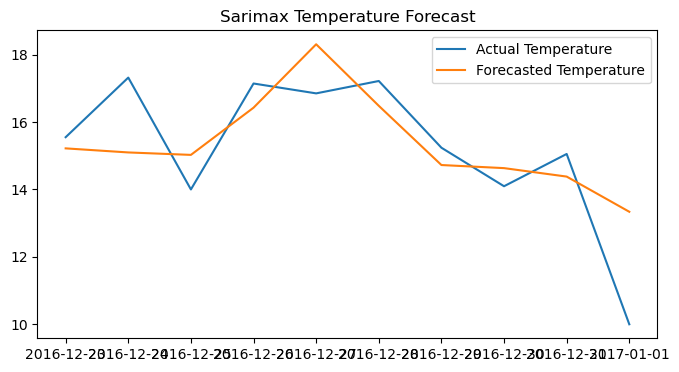

In [12]:
plt.figure(figsize=(8,4))
plt.plot(y1,label = 'Actual Temperature')
plt.plot(y2,label = 'Forecasted Temperature')
plt.title('Sarimax Temperature Forecast')
plt.legend()
plt.show()